<a href="https://colab.research.google.com/github/rchang-LYN/dataset/blob/main/(1_11)Detectron2_training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install detectron2/Get data

Reference: https://github.com/facebookresearch/detectron2/blob/master/INSTALL.md

In [ ]:
# !pip install pyyaml==5.1

# import torch
# TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
# CUDA_VERSION = torch.__version__.split("+")[-1]
# print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# # Install detectron2 that matches the above pytorch version
# # See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# # If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# # exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

In [ ]:
# # check pytorch installation: 
# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version

# import detectron2
# from detectron2.utils.logger import setup_logger
# setup_logger()

# # import some common libraries
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# # import some common detectron2 utilities
# from detectron2 import model_zoo
# from detectron2.engine import DefaultPredictor
# from detectron2.config import get_cfg
# from detectron2.utils.visualizer import Visualizer
# from detectron2.data import MetadataCatalog, DatasetCatalog

1.9.0+cu111 True


In [ ]:
# restart runtime!


!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# https://detectron2.readthedocs.io/tutorials/install.html
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html



     |████████████████████████████████| 274 kB 5.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=b927a3adf1a55a875c7e7898ad4374d5634844ec5dd176a32584988440c32484
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 790 kB/s 
     |████████████████████████████████| 49 kB 2.7 MB/s 
     |████████████████████████████████| 145 kB 9.2 MB/s 
     |████████████████████████████████| 130 kB 48.1 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 843 kB 48.6 MB/s 
     |████████████████████████████████

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
!wget https://github.com/rchang-LYN/dataset/raw/main/heinz.zip
!unzip heinz.zip
!ls

# !wget https://github.com/rchang-LYN/dataset/raw/main/redketchup.zip
# !unzip redketchup.zip
# !ls

--2022-01-12 20:33:34--  https://github.com/rchang-LYN/dataset/raw/main/heinz.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rchang-LYN/dataset/main/heinz.zip [following]
--2022-01-12 20:33:34--  https://raw.githubusercontent.com/rchang-LYN/dataset/main/heinz.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3342627 (3.2M) [application/zip]
Saving to: ‘heinz.zip’

heinz.zip           100%[===================>]   3.19M  --.-KB/s    in 0.06s   

2022-01-12 20:33:36 (49.2 MB/s) - ‘heinz.zip’ saved [3342627/3342627]

Archive:  heinz.zip
   creating: heinz/heinz/
  inflating: heinz/heinz/test.

In [ ]:
!ls 'heinz'

heinz


In [ ]:
# import zipfile
from google.colab import drive
drive.mount('/content/drive/')
# !unzip -q "/content/drive/MyDrive/Colab Notebooks/data.zip"


Mounted at /content/drive/


## 2a. Register data-set

(if in COCO format)



In [ ]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
from detectron2.data.datasets import register_coco_instances
import random
from matplotlib import pyplot as plt

from detectron2.data import DatasetCatalog, MetadataCatalog


In [ ]:
# import os
# import numpy as np
# import json
# from detectron2.structures import BoxMode

# from detectron2.data.datasets import register_coco_instances
path = '/content/heinz/heinz'

register_coco_instances("train", {}, os.path.join(path, "train.json"), os.path.join(path, "train"))
register_coco_instances("test", {}, os.path.join(path, "test.json"), os.path.join(path, "test"))

# register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/image/dir")
# register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")

WARNING [01/12 20:34:22 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/12 20:34:22 d2.data.datasets.coco]: Loaded 30 images in COCO format from /content/heinz/heinz/train.json


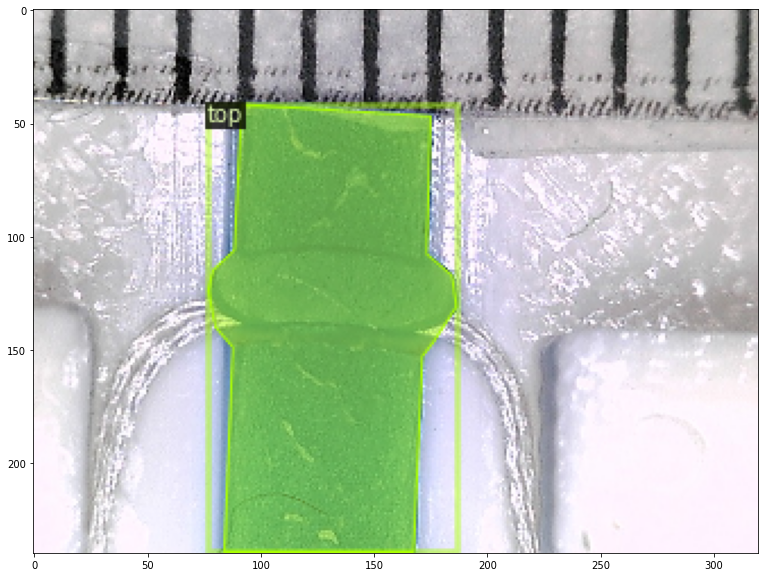

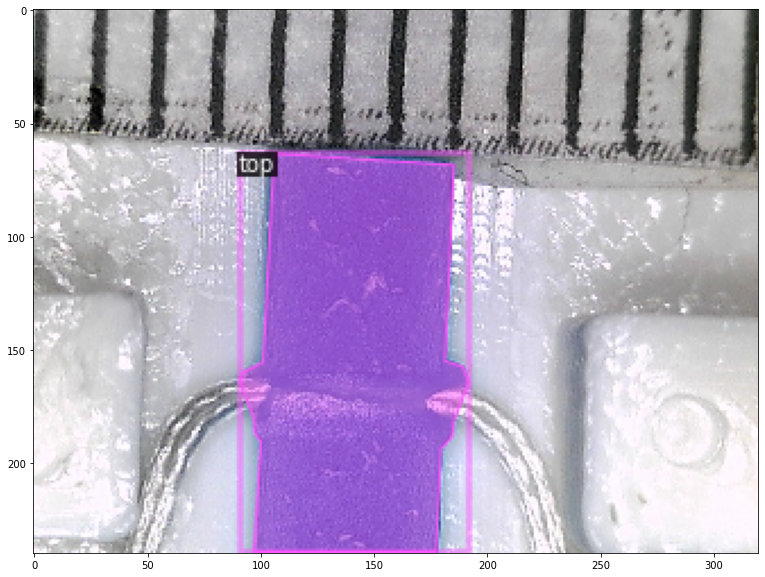

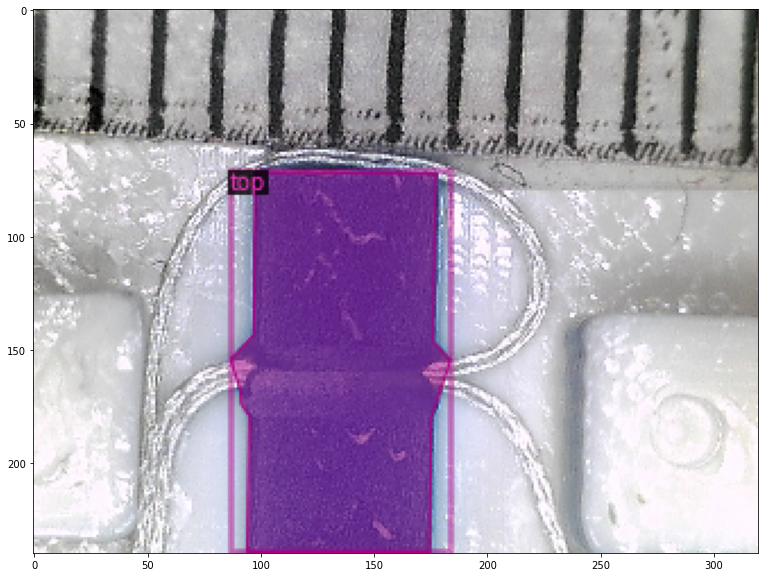

In [ ]:
# import random
# from matplotlib import pyplot as plt

# from detectron2.data import DatasetCatalog, MetadataCatalog

dataset_dicts = DatasetCatalog.get("train")
microcontroller_metadata = MetadataCatalog.get("train")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=microcontroller_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## 2b. Register data-set

(if not in COCO format)

In [ ]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode

def get_microcontroller_dicts(directory):
    classes = ['top', 'bottom']
    dataset_dicts = []
    for idx, filename in enumerate([file for file in os.listdir(directory) if file.endswith('.json')]):
        json_file = os.path.join(directory, filename)
        with open(json_file) as f:
            img_anns = json.load(f)

        record = {}
        
        filename = os.path.join(directory, img_anns["imagePath"])
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = 480
        record["width"] = 480
      
        annos = img_anns["shapes"]
        objs = []
        for anno in annos:
            px = [a[0] for a in anno['points']]
            py = [a[1] for a in anno['points']]
            poly = [(x, y) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": classes.index(anno['label']),
                "iscrowd": 0
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train", "test"]:
    DatasetCatalog.register("microcontroller_" + d, lambda d=d: get_microcontroller_dicts('/content/drive/MyDrive/data/' + d))
    MetadataCatalog.get("microcontroller_" + d).set(thing_classes=['top', 'bottom'])
microcontroller_metadata = MetadataCatalog.get("microcontroller_train")

## Train model

(fine-tune a pretrained FasterRCNN instance segmentation model on stellate dataset)

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode
import glob


In [ ]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 200
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()


[01/12 20:34:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:03, 56.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

[01/12 20:34:57 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/12 20:35:31 d2.utils.events]:  eta: 0:05:01  iter: 19  total_loss: 1.563  loss_cls: 0.6803  loss_box_reg: 0.1846  loss_mask: 0.6824  loss_rpn_cls: 0.003662  loss_rpn_loc: 0.008093  time: 1.6895  data_time: 0.0224  lr: 2.3976e-05  max_mem: 2333M
[01/12 20:36:05 d2.utils.events]:  eta: 0:04:27  iter: 39  total_loss: 1.097  loss_cls: 0.3227  loss_box_reg: 0.1815  loss_mask: 0.5645  loss_rpn_cls: 0.001358  loss_rpn_loc: 0.007876  time: 1.6779  data_time: 0.0084  lr: 4.8951e-05  max_mem: 2333M
[01/12 20:36:38 d2.utils.events]:  eta: 0:03:53  iter: 59  total_loss: 0.7547  loss_cls: 0.1595  loss_box_reg: 0.1824  loss_mask: 0.3998  loss_rpn_cls: 0.0006257  loss_rpn_loc: 0.006034  time: 1.6755  data_time: 0.0080  lr: 7.3926e-05  max_mem: 2333M
[01/12 20:37:13 d2.utils.events]:  eta: 0:03:24  iter: 79  total_loss: 0.5628  loss_cls: 0.1169  loss_box_reg: 0.1787  loss_mask: 0.2751  loss_rpn_cls: 0.0005006  loss_rpn_loc: 0.003005  time: 1.6922  data_time: 0.0093  lr: 9.8901e-05  max_mem: 2333M


## Inference 

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
cfg.DATASETS.TEST = ("test", )
predictor = DefaultPredictor(cfg)

In [ ]:
os.mkdir('/content/mask')

In [ ]:
# #works!!
# test = 0
# for im_path in glob.glob('heinz/test*.jpg'):
#   print(im_path)

def GetMask(im, im_path):
    outputs = predictor(im)
    mask = outputs["instances"].pred_masks
    if(mask != 0):  # use continue
      i = len(mask[0][0])
      j = len(mask[0])
      test = im
      for j1 in range(j):
        for i1 in range(i):
          if(outputs["instances"].pred_masks[0][j1][i1] == False):
            test[j1,i1] = 10
      cv2_imshow(test)
      print(im_path)
      asdf = cv2.imwrite('/content/mask/{}'.format(os.path.basename(im_path)), test)



im_path = '/content/30 pwr, ds/A531 - 20220112_115001.bmp'
im = cv2.imread(im_path) # simplify this, insert into function
GetMask(im, im_path)
# input_folder = '/content/30 pwr, ds/'
# for im_path in glob.glob('{}*.bmp'.format(input_folder)):
#   # im_path = '/content/A525 - 20220112_114907.bmp'
#   im = cv2.imread(im_path)
#   GetMask(im, im_path)

# im = cv2.imread('content/heinz/20.jpg')
# outputs = predictor(im)
# mask = outputs["instances"].pred_masks
# i = len(mask[0][0])
# j = len(mask[0])
# test = im
# for j1 in range(j):
#   for i1 in range(i):
#     if(outputs["instances"].pred_masks[0][j1][i1] == False):
#       test[j1,i1] = 10
# cv2_imshow(test)
# test = test +1
# asdf = cv2.imwrite('/content/sample_data/{}.png'.format(test))

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


RuntimeError: ignored

In [ ]:
#workss!! pull from default test folder
from detectron2.utils.visualizer import ColorMode
import glob
dataset_dicts = DatasetCatalog.get("test")
# for im_path in glob.glob('/content/redketchup/test*.jpg'):
for im_path in glob.glob('/content/heinz/test*.jpg'):
  im = cv2.imread(im_path)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
  )
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  plt.figure(figsize = (14, 10))
  plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
  plt.show()
# for d in random.sample(dataset_dicts, 3):
#     img = cv2.imread(d["file_name"])
#     # im_path in glob.glob('/content/sample_data/hello*.jpg'):    
#     # im = cv2.imread(im_path)
#     outputs = predictor(im)
#     v = Visualizer(im[:, :, ::-1],
#                    metadata=microcontroller_metadata, 
#                    scale=0.8, 
#                    instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
#     )
#     v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#     plt.figure(figsize = (14, 10))
#     plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
#     plt.show()


ValueError: ignored

In [ ]:
import pickle
filename = '/content/drive/MyDrive/## Instance Segmentation/config.pkl'
with open(filename, 'wb') as f:
     pickle.dump(cfg, f)

FileNotFoundError: ignored

hi


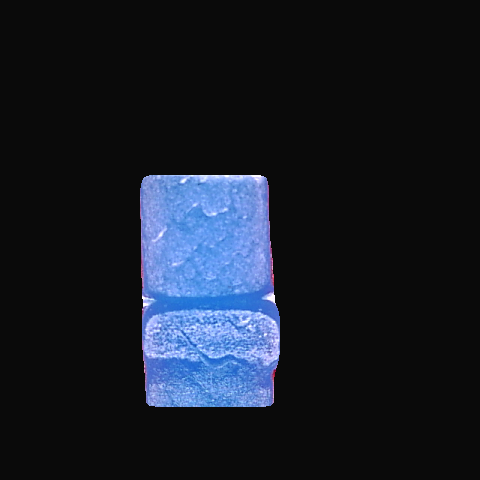

In [ ]:
#open model from drive
filename = '/content/drive/MyDrive/## Instance Segmentation/config.pkl'
with open(filename, 'rb') as f:
     cfg = pickle.load(f)
predictor = DefaultPredictor(cfg)
def GetMask(img):
    outputs = predictor(img)
    mask = outputs["instances"].pred_masks
    i = len(mask[0][0])
    j = len(mask[0])
    test = im
    for j1 in range(j):
      for i1 in range(i):
        if(outputs["instances"].pred_masks[0][j1][i1] == False):
          test[j1,i1] = 10
    cv2_imshow(test)
    asdf = cv2.imwrite('/content/sample_data/hello.png', test)

im = cv2.imread('/content/redketchup/test/6s top (35).jpg')
GetMask(im)


In [ ]:
# supposed to load model w/o training

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # Set threshold for this model
cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/Colab Notebooks/model_final.pth' # Set path model .pth
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
predictor = DefaultPredictor(cfg)

In [ ]:
#pull from image from any folder

from detectron2.utils.visualizer import ColorMode
import glob

for im_path in glob.glob('/content/sample_data/hello*.jpg'):    
    im = cv2.imread(im_path)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=balloon_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

##Image Analysis

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
# ap.add_argument("-w", "--width", type=float, required=True,
# 	help="width of the left-most object in the image (in inches)")
# args = vars(ap.parse_args())

/content/post/25.png


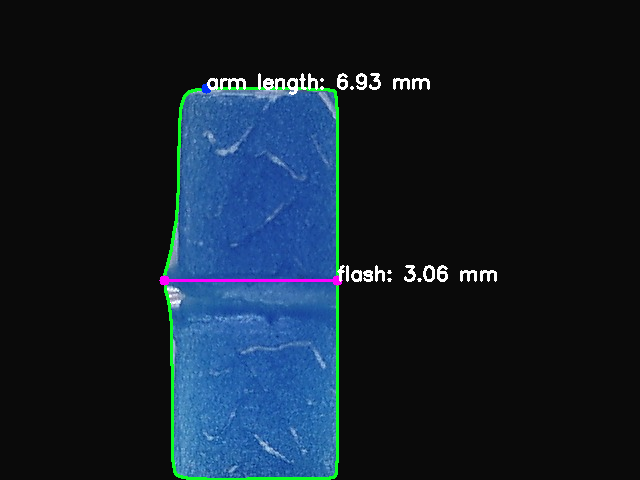

/content/post/20 (1).png


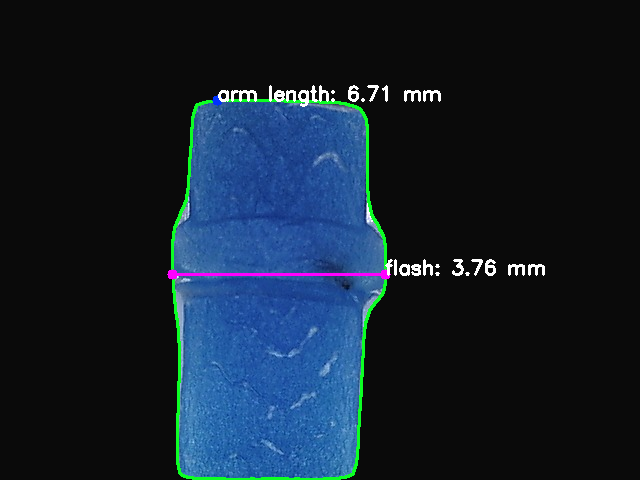

/content/post/24.png


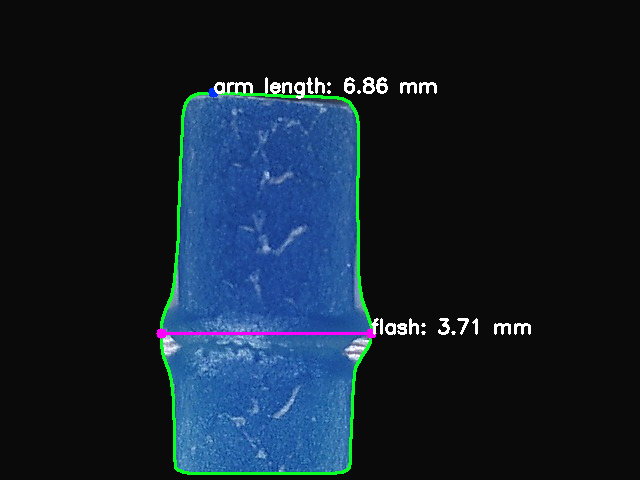

/content/post/19.png


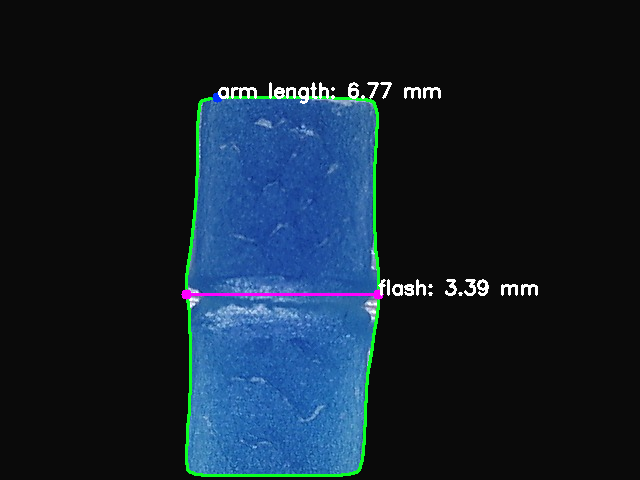

/content/post/27.png


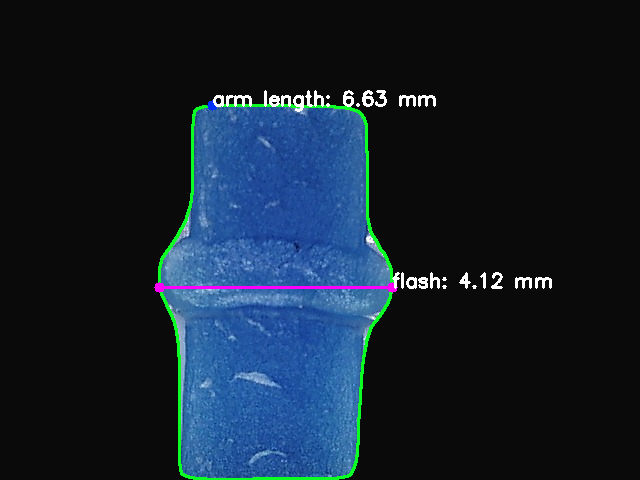

/content/post/29.png


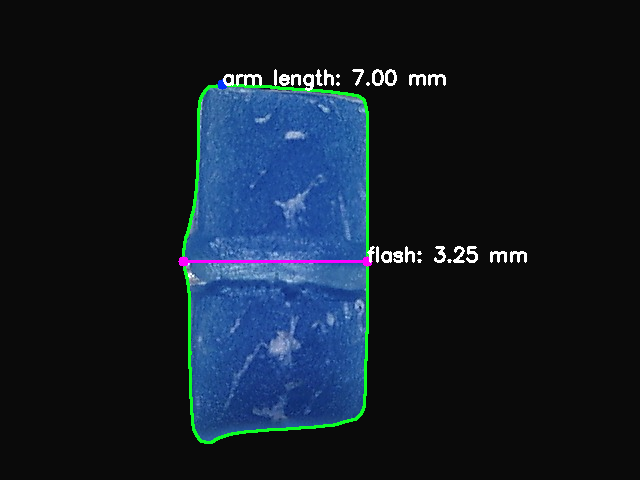

/content/post/19 (1).png


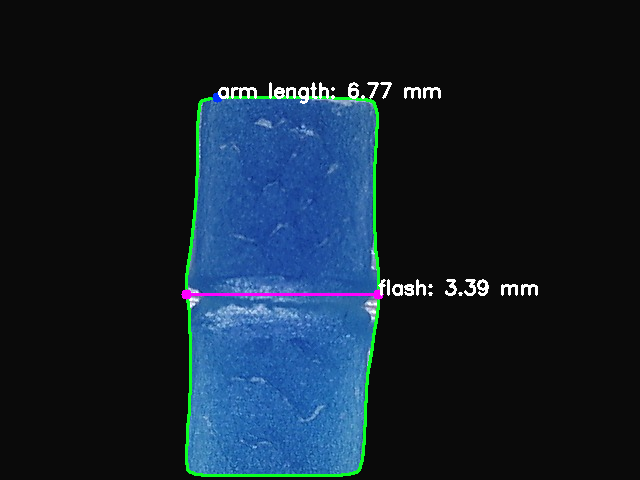

In [ ]:
import glob
import os

for file in glob.iglob(r'/content/post/*.png'): # glob or iglob??
  print(file)
  # load image, grayscale, Gaussian blur, threshold, find contours
  image = cv2.imread(file, cv2.IMREAD_UNCHANGED)
  # cv2_imshow(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)

  blur = cv2.GaussianBlur(gray, (3,3), 0)
  # cv2_imshow(blur)

  thresh = cv2.threshold(blur, 10, 255, cv2.THRESH_BINARY)[1]


  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]
  c = min(contours, key=cv2.contourArea)

  # print(len(c))
  w = c[:,:,1]
  # print(w)
  right = c[:, :, 0]
  # print(right)
  # test = tuple(c[w])
  # print(c[,])
  max_width = 0
  left_width = 0 # check this
  right_width = 0
  pix_mm = 56.6
  for i in range(len(c)): #should change to a set range, determine later
    get_indexes = lambda num, w: [j for (y, j) in zip(w, range(len(w))) if num == y]
    y_ = c[i, :, 1] 
    x_ = c[i, :, 0]
    if(x_ > 250 ): #change this later
      store = get_indexes(y_, w)
      if len(store) == 2:
        width = x_ - c[store[0], :, 0]
        if width > max_width:
          max_width = width
          right_width = tuple(c[i][0])
          left_width = tuple(c[store[0]][0])
          # print(right_width)


  top = tuple(c[c[:, :, 1].argmin()][0])
  height = image.shape[0]   #double check this
  length = (height - top[1])/pix_mm
  max_width = max_width/pix_mm
  cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
  cv2.circle(image, left_width, 5, (255, 0, 255), -1)
  cv2.circle(image, right_width, 5, (255, 0, 255), -1)  
  cv2.line(image, left_width, right_width, (255, 0, 255), 2)
  cv2.circle(image, top, 5, (255, 50, 0), -1)
  cv2.putText(image, "flash: {:.2f} mm".format(max_width[0]),
      right_width, cv2.FONT_HERSHEY_SIMPLEX,
      0.65, (255, 255, 255), 2)
  cv2.putText(image, "arm length: {:.2f} mm".format(length),
      top, cv2.FONT_HERSHEY_SIMPLEX,
      0.65, (255, 255, 255), 2)

  # '{:.2f}'.format(5.39120))
  cv2_imshow(image)
  # print(os.path.basename(file))
  asdf = cv2.imwrite('content/test/{}.png'.format(os.path.basename(file)), image)
  # asdf = cv2.imwrite('/content/sample_data/A095 - 20211130_180615.png', test)
  # right: {}'.format(right)
